In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timezone
import pickle
sys.path.append('/home/yutao4/Sat_Simulator/')
os.chdir('/home/yutao4/Sat_Simulator/')

In [2]:
one_sat_data= pickle.load(open('data/sat_103b.pkl', 'rb'))

In [3]:
high_priority_image_list=pickle.load(open('data/high_priority_list.pkl', 'rb'))

In [4]:
one_sat_data.sort(key=lambda x: x.time)

In [5]:
x = [(img.time.to_datetime()-datetime(2021,7,1,tzinfo=timezone.utc)).total_seconds()/86400 for img in one_sat_data]
y = [1 if img.filter_result['california'][0] else 0 for img in one_sat_data]

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def draw_band(x, numbers, line_colors, rect_height=0.4, rect_width=1.0):
    # Calculate the number of rows needed
    num_rows = int(np.ceil((max(x) - min(x)) / rect_width))

    # Create a new plot with appropriate height for number of rows
    fig, axs = plt.subplots(num_rows, 1, figsize=(10, num_rows * rect_height))

    # Loop through the rows and draw rectangles with lines as necessary
    for row_idx, ax in enumerate(axs):
        # Calculate the range of x values for this row
        row_x_min = min(x) + row_idx * rect_width
        row_x_max = min(row_x_min + rect_width, max(x))
        row_x = [xi for xi in x if row_x_min <= xi < row_x_max]

        # Loop through the x values in this row and draw lines as necessary
        for xi, num in zip(row_x, numbers):
            if num in line_colors:
                color = line_colors[num]
                ax.axvline(x=xi, color=color, linewidth=.1 if color == "red" else 1)

        # Set the axis limits and remove ticks and labels
        ax.set_xlim(row_x_min, row_x_max)
        ax.set_ylim(0, 1)
        ax.set_xticks([])
        ax.set_yticks([])

    # Add a legend to the last subplot
    legend_labels = [f"{num}: {color}" for num, color in line_colors.items()]
    fig.legend(legend_labels, fontsize=10)

    # Show the plot
    plt.show()


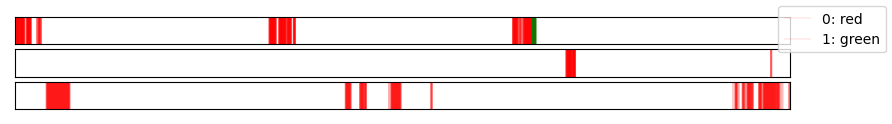

In [12]:
# Select xs and ys where 9.6<x<10.2
x0 = [xi for xi in x if 9.6 <= xi < 10.2]
y0 = [yi for xi, yi in zip(x, y) if 9.6 <= xi < 10.2]

draw_band(x0, y0, {0: 'red', 1: 'green'}, rect_width=0.2)